In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:

import os

# Load dataset dari Google Drive

os.chdir('/content/drive/My Drive/Dataset/')

os.listdir('.')

['heart.csv', 'iris.csv', 'pima-indians-diabetes.csv', 'sonar.csv']

In [38]:
file_exists = os.path.isfile('heart.csv')

file_exists

True

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
filename = 'heart.csv'
dataset = pd.read_csv(filename)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
print(dataset['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [42]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


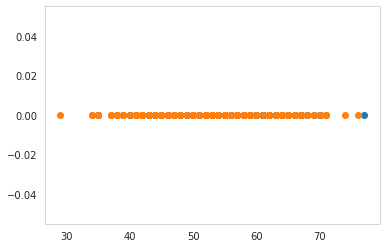

In [43]:
target_0 = dataset.loc[dataset['target'] == 0]
target_1 = dataset.loc[dataset['target'] == 1]
plt.plot(target_0["age"], np.zeros_like(target_0["age"]), 'o')
plt.plot(target_1["age"], np.zeros_like(target_1["age"]), 'o')
plt.grid()
plt.show()

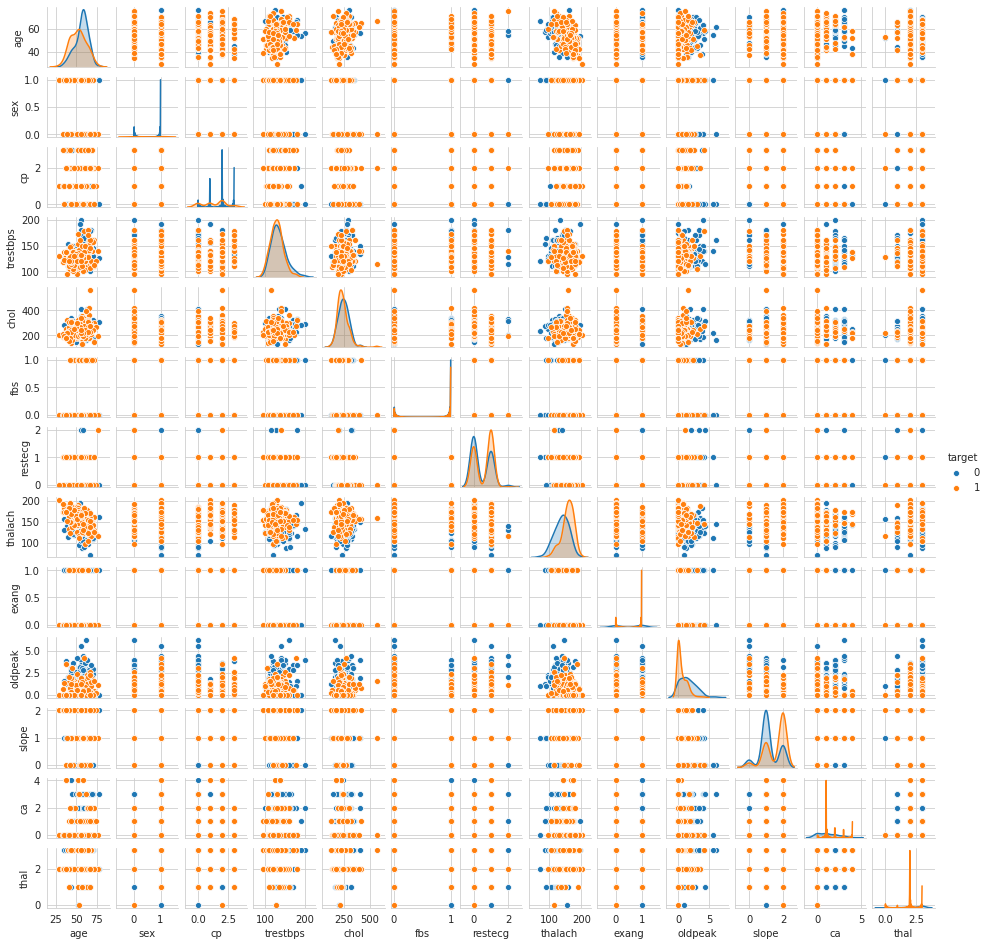

In [60]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="target", height=1)
plt.show()

In [53]:
Y = dataset['target']
x = dataset.drop(['target'], axis=1)


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.2, random_state=10)


In [56]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

rf_model = RandomForestClassifier(n_estimators=150, bootstrap=True, max_features = "sqrt")
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf_model.score(x_test, y_test)))
print('F1 SCORE = ', f1_score(y_test, y_pred, average="macro"))
print('PRECISION = ', precision_score(y_test, y_pred, average="macro"))
print('RECALL SCORE =', recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.80
F1 SCORE =  0.801948051948052
PRECISION =  0.8021505376344086
RECALL SCORE = 0.8087912087912088


In [49]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, precision_score, recall_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) # .score() -> Accuracy
print('F1 SCORE = ', f1_score(y_test, y_pred, average="macro"))
print('PRECISION = ', precision_score(y_test, y_pred, average="macro"))
print('RECALL SCORE =', recall_score(y_test, y_pred, average="macro"))

Accuracy of logistic regression classifier on test set: 0.77
F1 SCORE =  0.768939393939394
PRECISION =  0.7693548387096774
RECALL SCORE = 0.7752747252747253


In [90]:
#SVM
from sklearn.svm import SVC
def FungsiSVM(kernel_type):
  classifier = kernel_type
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print('Accuracy of SVC classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))
  print('F1 SCORE = ', f1_score(y_test, y_pred, average="macro"))
  print('PRECISION = ', precision_score(y_test, y_pred, average="macro"))
  print('RECALL SCORE =', recall_score(y_test, y_pred, average="macro"))

FungsiSVM(SVC(kernel = "rbf"))
FungsiSVM(SVC(kernel = "poly"))
FungsiSVM(SVC(kernel = "linear"))

Accuracy of SVC classifier on test set: 0.82
F1 SCORE =  0.81889338731444
PRECISION =  0.8209677419354839
RECALL SCORE = 0.828021978021978
Accuracy of SVC classifier on test set: 0.72
F1 SCORE =  0.721311475409836
PRECISION =  0.7373626373626374
RECALL SCORE = 0.7373626373626374
Accuracy of SVC classifier on test set: 0.75
F1 SCORE =  0.7530364372469636
PRECISION =  0.7553763440860215
RECALL SCORE = 0.760989010989011


In [89]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) #atau (3)
knn.fit(x_train, y_train)
print("KNN Test Score", knn.score(x_test, y_test))

KNN Test Score 0.819672131147541


In [52]:
#XGBoost
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimator = 100)
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xg_reg.score(x_test, y_test)))
print('F1 SCORE = ', f1_score(y_test, y_pred, average="macro"))
print('PRECISION = ', precision_score(y_test, y_pred, average="macro"))
print('RECALL SCORE =', recall_score(y_test, y_pred, average="macro"))

Accuracy of XGBoost classifier on test set: 0.82
F1 SCORE =  0.8165162701668034
PRECISION =  0.815359477124183
RECALL SCORE = 0.8181318681318681


Dari semua metode yang digunakan, score tertinggi didapatkan pada KNeighbors dan XGBoost yaitu 82%